In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Initial Conditions

Here a flow with M1 = 2.81 is deflected by a wedge (wedge angle = 10 deg.)

From analytical theory, the shock angle should form at 30 deg. for gamma = 5/3, providing density compression ratio = 1.6 and pressure ratio 2.2. The simulation results reproduce the analytic value.

Radiative cooling is turn on halfway through the simulation (TS > 2400). Cooling is non-zero only if temperature > pre-shock temperature, i.e it drives the system to an isothermal state.

The final oblique shock has a lower shock angle = 22.4, and higher density. The radiatively-cooled result shows equal density and pressure ratios = 1.88.

The radiatively-cooled oblique shock has properties akin to an equivalent system with gamma = 1, which is the value of the polytropic index that defines an isothermal process.


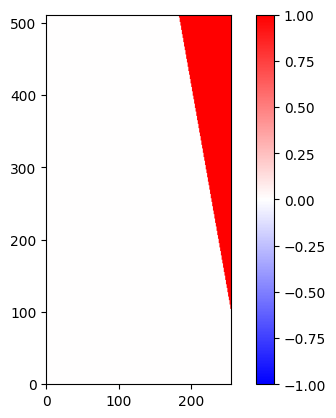

In [273]:
tag = ''
data = np.loadtxt("./output" + tag + "/bound-0.txt")
plt.imshow(data,origin='lower',cmap='bwr',vmin=-1,vmax=1)
plt.colorbar()
bound = data

ny, nx = np.shape(bound)

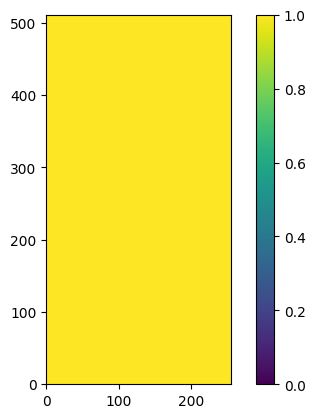

In [274]:
data = np.loadtxt("./output" + tag + "/rho-0.txt")
plt.imshow(data,vmin=0,origin='lower')
plt.colorbar()

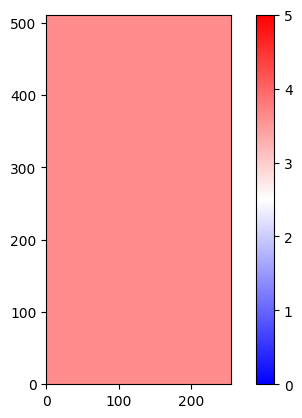

In [275]:
data = np.loadtxt("./output" + tag + "/v-0.txt")
plt.imshow(data,vmin=0,vmax=5,origin='lower',cmap='bwr')
plt.colorbar()

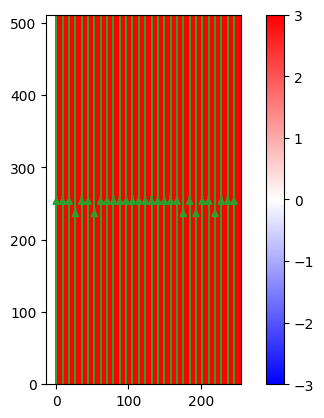

In [276]:
data = np.loadtxt("./output" + tag + "/v-0.txt")
plt.imshow(data,vmin=-3,vmax=3,origin='lower',cmap='bwr')
plt.colorbar()

v = np.loadtxt("./output/v-0.txt")
u = np.loadtxt("./output/u-0.txt")
m,n = u.shape
x, y = np.arange(0,n,1), np.arange(0,m,1)
plt.streamplot(x,y,u,v, density=1.0, color='tab:green')

# Final Output

## Pre-Cooling

Text(0.5, 1.0, 'Pressure p [-]')

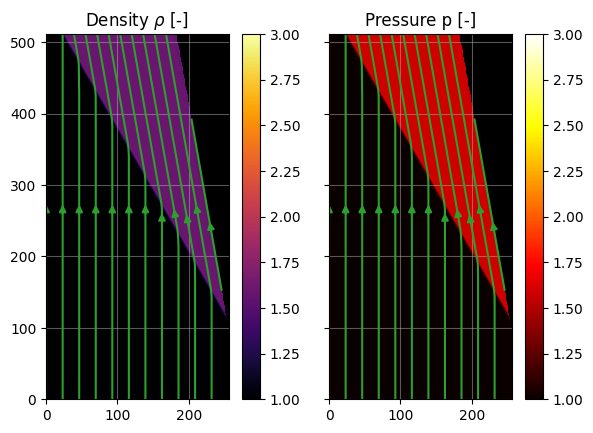

In [279]:
fig, axs = plt.subplots(1,2,figsize=(6,4),sharey=True)

field = 'rho'
t = '-2400'
data = np.loadtxt('./output' + tag + '/' + field + t + '.txt')
rho = data.copy()
rho[np.where(bound>0)] = float('nan')
im = axs[0].imshow(rho,origin='lower',cmap='inferno',vmin=1,vmax=3)
plt.colorbar(im)

field = 'p'
data = np.loadtxt('./output' + tag + '/' + field + t + '.txt')
p = data.copy()
p[np.where(bound>0)] = float('nan')
im = axs[1].imshow(rho,origin='lower',cmap='hot',vmin=1,vmax=3)
plt.colorbar(im)


v = np.loadtxt('./output' + tag + '/v' + t +'.txt')
u = np.loadtxt('./output' + tag + '/u' + t +'.txt')
v[np.where(bound>0)] = float('nan')
u[np.where(bound>0)] = float('nan')
m,n = u.shape
x, y = np.arange(0,n,1), np.arange(0,m,1)


for ii in range(axs.shape[0]):
    axs[ii].set_ylim(ymin=0)
    axs[ii].set_xlim(xmin=0)
    axs[ii].grid(alpha=0.5)
    axs[ii].set_facecolor("black")
    axs[ii].streamplot(x,y,u,v, density=0.4, color='tab:green',broken_streamlines=False)
    
fig.tight_layout(pad=0.2)

axs[0].set_title('Density $\\rho$ [-]')
axs[1].set_title('Pressure p [-]')

Text(0.5, 1.0, 'Pre-Cooling')

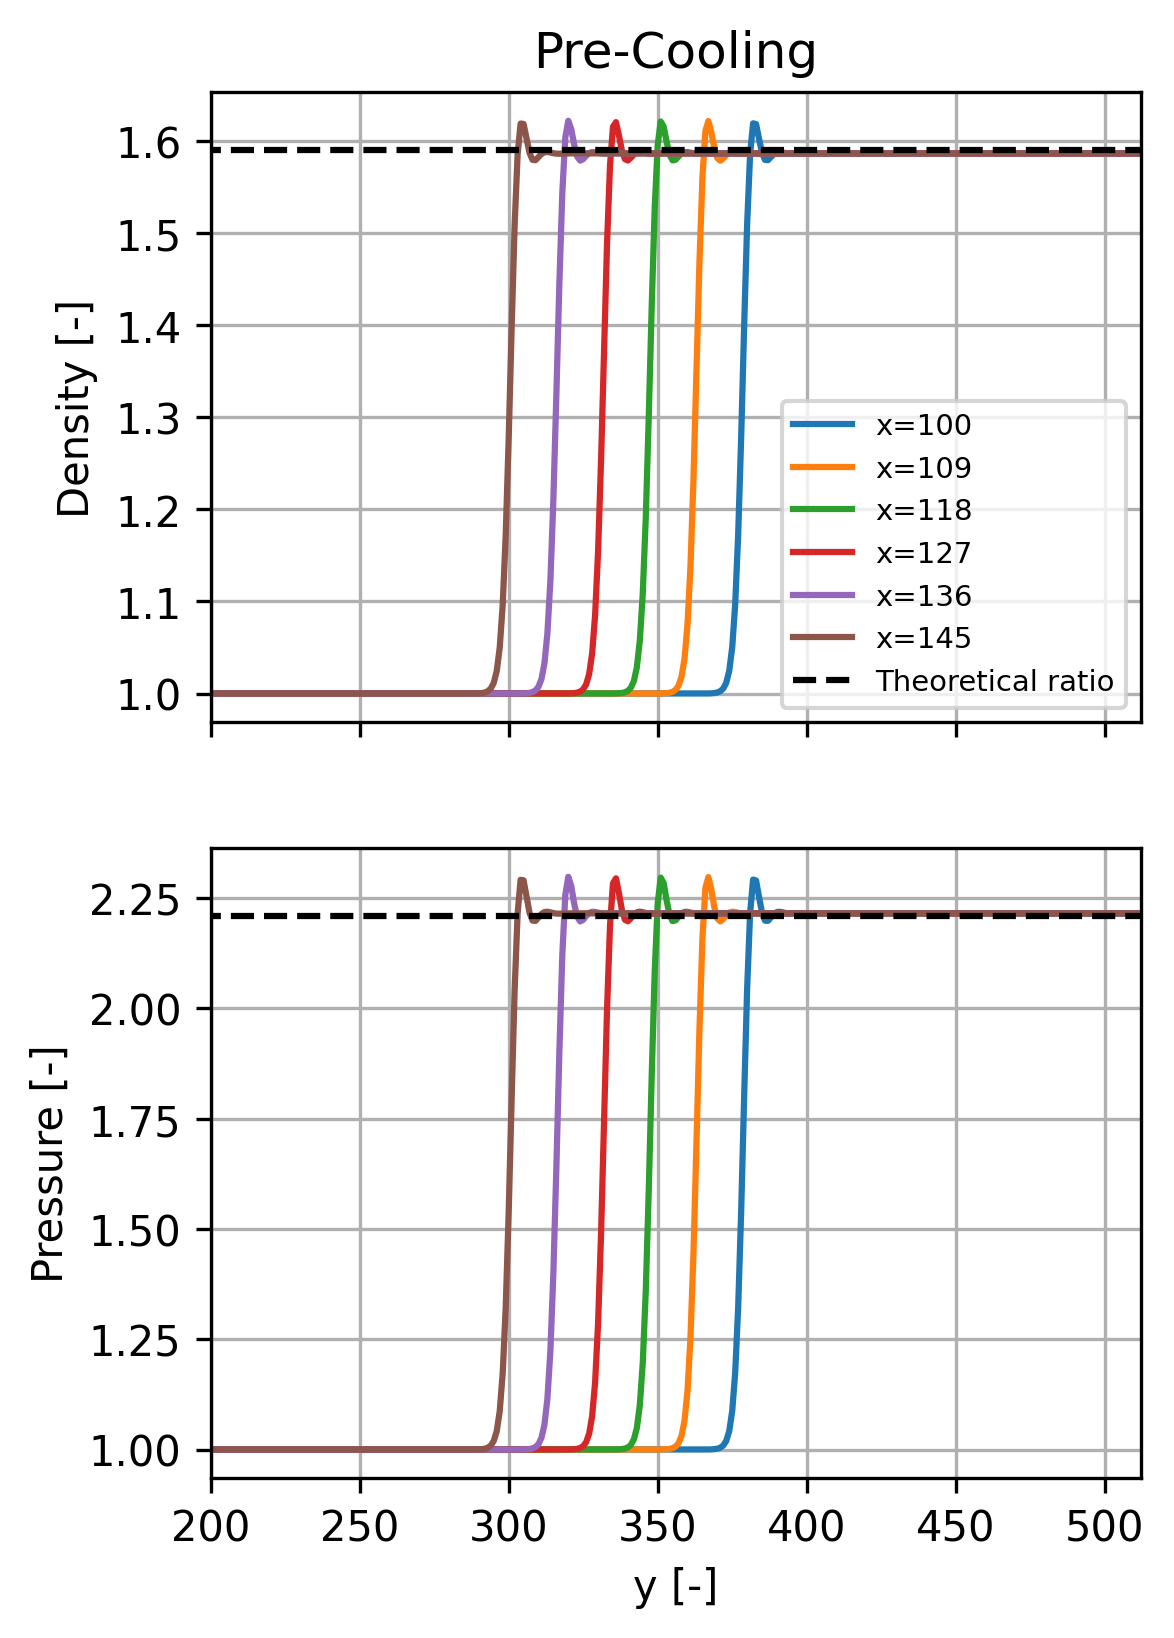

In [280]:
fig, axs = plt.subplots(2,1,figsize=(4,6),sharex=True,dpi=300)

xs, ys = [], []

for ii in range(100,150,(nx-20)//25):
    
    rho_out = rho[:,ii]
    p_out = p[:,ii]
    axs[0].plot(rho_out,label='x='+str(ii))
    axs[1].plot(p_out,label='x='+str(ii))
    
    xs.append(ii)
    ys.append(np.argmax(rho_out))
    
axs[0].set_ylabel('Density [-]')
axs[1].set_ylabel('Pressure [-]')
for ii in range(axs.shape[0]):
    axs[ii].grid()

    

axs[-1].set_xlabel('y [-]')
axs[-1].set_xlim([200,ny])

xs = np.asarray(xs)
ys = np.asarray(ys)

# Analytical ratio
axs[0].plot([0,ny],[1.59]*2,'--k',label='Theoretical ratio')
axs[1].plot([0,ny],[2.21]*2,'--k')
axs[0].legend(fontsize=7)

axs[0].set_title('Pre-Cooling')


# shock angle

shock angle = 29.98 deg


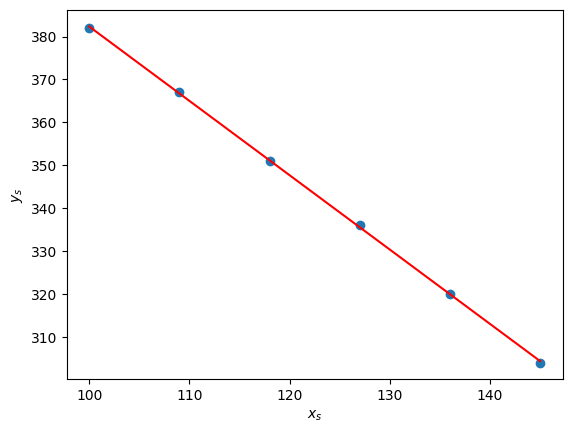

In [281]:
plt.plot(xs,ys,'o')
plt.xlabel('$x_s$')
plt.ylabel('$y_s$')

from scipy.optimize import curve_fit

def fn(x,m,c):
    return m*x + c

popt, pcov = curve_fit(fn, xs, ys)
plt.plot(xs, fn(xs, *popt), 'r-')

angle = np.arctan(popt[0])
print('shock angle = %1.2f deg'%(90+np.rad2deg(angle)))

# Post-Cooling

Text(0.5, 1.0, 'Pressure p [-]')

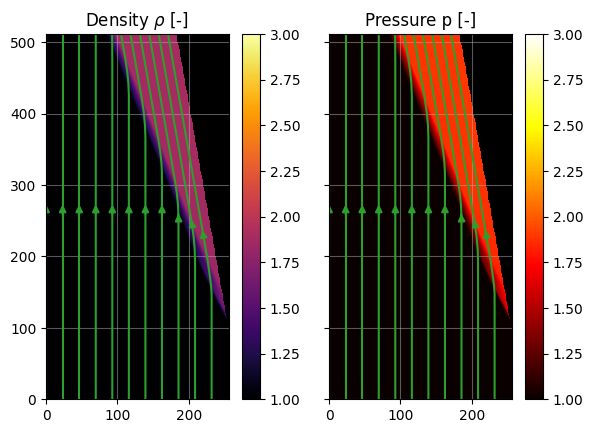

In [282]:
fig, axs = plt.subplots(1,2,figsize=(6,4),sharey=True)

field = 'rho'
t = ''
data = np.loadtxt('./output' + tag + '/' + field + t + '.txt')
rho = data.copy()
rho[np.where(bound>0)] = float('nan')
im = axs[0].imshow(rho,origin='lower',cmap='inferno',vmin=1,vmax=3)
plt.colorbar(im)

field = 'p'
data = np.loadtxt('./output' + tag + '/' + field + t + '.txt')
p = data.copy()
p[np.where(bound>0)] = float('nan')
im = axs[1].imshow(rho,origin='lower',cmap='hot',vmin=1,vmax=3)
plt.colorbar(im)


v = np.loadtxt('./output' + tag + '/v' + t +'.txt')
u = np.loadtxt('./output' + tag + '/u' + t +'.txt')
v[np.where(bound>0)] = float('nan')
u[np.where(bound>0)] = float('nan')
m,n = u.shape
x, y = np.arange(0,n,1), np.arange(0,m,1)


for ii in range(axs.shape[0]):
    axs[ii].set_ylim(ymin=0)
    axs[ii].set_xlim(xmin=0)
    axs[ii].grid(alpha=0.5)
    axs[ii].set_facecolor("black")
    axs[ii].streamplot(x,y,u,v, density=0.4, color='tab:green',broken_streamlines=False)
    
fig.tight_layout(pad=0.2)

axs[0].set_title('Density $\\rho$ [-]')
axs[1].set_title('Pressure p [-]')

Text(0.5, 1.0, 'Post-Cooling')

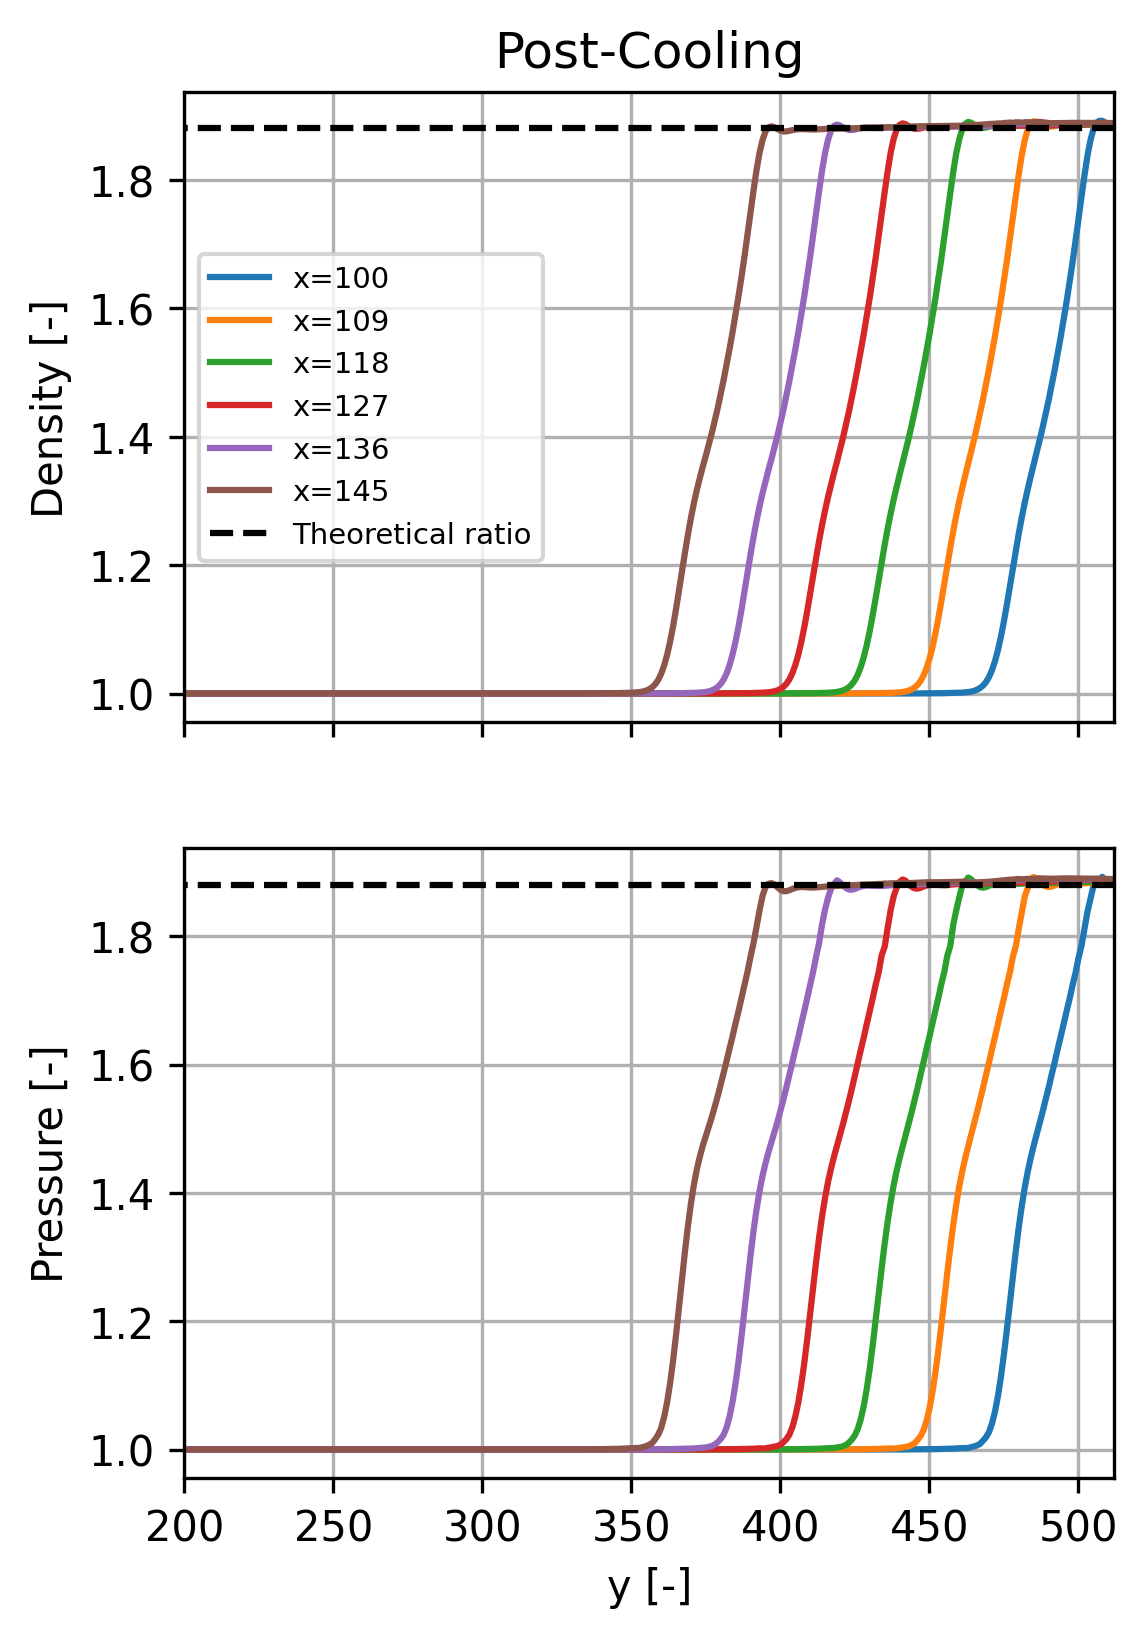

In [283]:
fig, axs = plt.subplots(2,1,figsize=(4,6),sharex=True,dpi=300)

xs, ys = [], []

for ii in range(100,150,(nx-20)//25):
    
    rho_out = rho[:,ii]
    p_out = p[:,ii]
    axs[0].plot(rho_out,label='x='+str(ii))
    axs[1].plot(p_out,label='x='+str(ii))
    
    xs.append(ii)
    ys.append(np.argmax(rho_out))
    
axs[0].set_ylabel('Density [-]')
axs[1].set_ylabel('Pressure [-]')
for ii in range(axs.shape[0]):
    axs[ii].grid()

    

axs[-1].set_xlabel('y [-]')
axs[-1].set_xlim([200,ny])

xs = np.asarray(xs)
ys = np.asarray(ys)

# Analytical ratio
axs[0].plot([0,ny],[1.88]*2,'--k',label='Theoretical ratio')
axs[1].plot([0,ny],[1.88]*2,'--k')
axs[0].legend(fontsize=7)

axs[0].set_title('Post-Cooling')


# Save to GIF

In [284]:
import imageio
import os


# Setup
field = 'p'
tag = ''  # Add tag if needed
clrmap = 'hot'
t_values = np.arange(0,5000,200)  # Modify with your actual t values
output_dir = './output' + tag + '/'
gif_frames_dir = './frames'
os.makedirs(gif_frames_dir, exist_ok=True)

# Loop over t values and create plots
filenames = []

for t in t_values:
    t = '-' + str(t)
    data = np.loadtxt(f'{output_dir}{field}{t}.txt')
    rho = data.copy()
    rho[np.where(bound > 0)] = float('nan')
    
    u = np.loadtxt(f'{output_dir}u{t}.txt')
    v = np.loadtxt(f'{output_dir}v{t}.txt')
    u[np.where(bound > 0)] = float('nan')
    v[np.where(bound > 0)] = float('nan')
    
    m, n = u.shape
    x, y = np.arange(0, n, 1), np.arange(0, m, 1)
    
    plt.figure(figsize=(6, 5))
    plt.imshow(rho, origin='lower', cmap=clrmap, vmin=1, vmax=2.5)
    plt.colorbar()
    plt.streamplot(x, y, u, v, density=0.4, color='tab:green', broken_streamlines=False)
    plt.ylim([0,ny])
    plt.xlim([0,nx])
    plt.xlabel('x [a.u.]')
    plt.ylabel('y [a.u.]')
    plt.grid(alpha=0.5)
    plt.title(field + ', ' + f'time = {t[1:]}')
    
    filename = f'{gif_frames_dir}/frame_{t}.png'
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

# Create GIF
gif_path = field + '_animation.gif'
with imageio.get_writer(gif_path, mode='I', duration=0.4) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

print(f'GIF saved to {gif_path}')


/var/folders/yx/1xzcdppn0xxd5w6bf_xnbgrw0000gn/T/ipykernel_60855/1857884259.py:51: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF saved to p_animation.gif


# Analytical Result

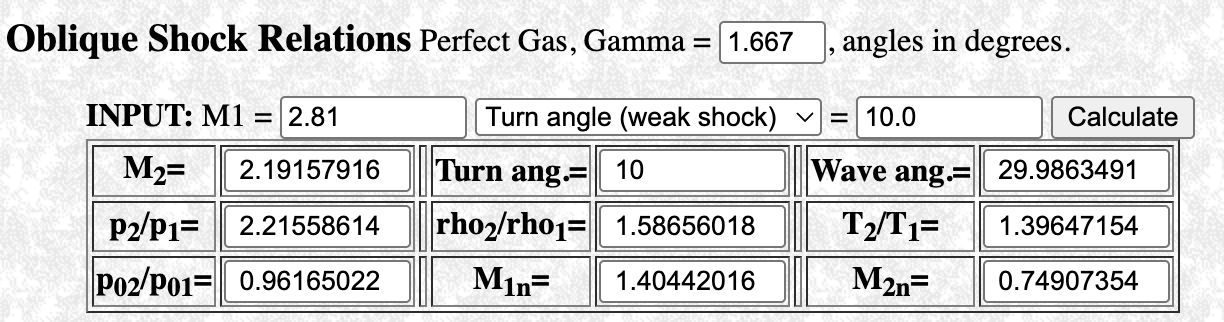

In [43]:
A = -6.0
alpha = 2
beta = 0.5
pressure = 2.2
density = 1.6
T = pressure * 1.0 / density
q = A * density * (density**alpha) * (T**beta)
tau = pressure / (1.667 -1) / q
tauH = 1.0 / 2.81 * np.sqrt(1.667 * 1.0 / 1.0)
print('cooling time = ', abs(tau))
print('hydro time = ', abs(tauH))
print('R = ', abs(tauH/tau))

cooling time =  0.11445487607327752
hydro time =  0.45947457000937814
R =  4.01446042119873


In [12]:
v = 2.81 * np.sqrt(1.667 * 1.0/1.0)
print('v = ', v)
print('M1 = ', v/np.sqrt(1.00 * 1.0/1.0))

v =  3.6280571522510505
M1 =  3.6280571522510505


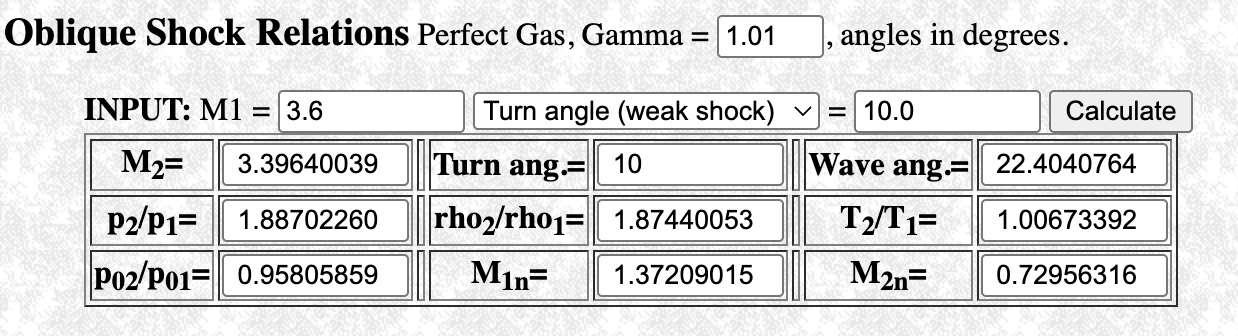